# Exercise 4: Mapping

*Created by Julia Kukulies: julia.kukulies@gu.se*

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Timeseries plot 

In [2]:
# import the three timeseries which have been saved as netcdf files (from exercise 3)
wind_Ice = xr.open_dataset('wind_Ice.nc')
wind_Ind = xr.open_dataset('wind_Ind.nc')
wind_Pac = xr.open_dataset('wind_Pac.nc')

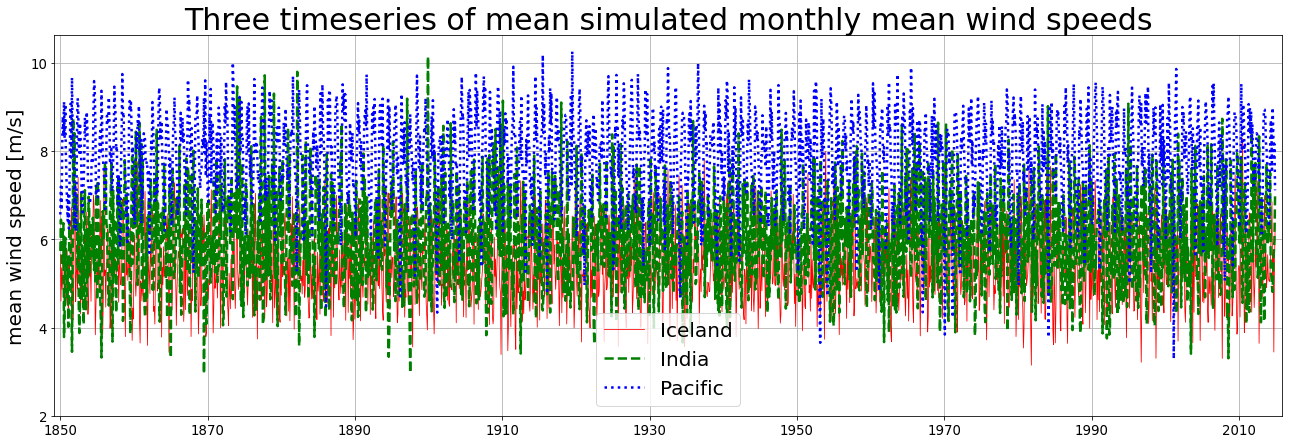

In [24]:
# timeseries plot 

plt.figure(figsize= (22,7))

# fontsize 
s = 20

# actual plot functions with input parameters
plt.plot(wind_Ice.sfcWind.values, color = 'r', linestyle = '-', linewidth = 0.8, label = 'Iceland')
plt.plot(wind_Ind.sfcWind.values, color = 'g',linestyle =  '--', linewidth= 2.5, label = 'India')
plt.plot(wind_Pac.sfcWind.values, color = 'b', linestyle= 'dotted', linewidth = 2.5, label ='Pacific')

# set xtick labels: show every 20 year (make use of the time format of xarray dataset)
plt.xticks(np.arange(np.size(wind_Ice.sfcWind.values))[::12*20], labels = wind_Ice.time.dt.year.values[::12*20], fontsize= s/1.5)
plt.yticks(np.arange(2,12,2), np.arange(2,12,2), fontsize= s/1.5)

# axis labels 
plt.ylabel('mean wind speed [m/s]', fontsize= s)

# axis limits
plt.xlim(-10, np.size(wind_Ice.sfcWind.values) + 10)


# grid on
plt.grid()

# title and legend 
plt.title('Three timeseries of mean simulated monthly mean wind speeds', fontsize = s*1.5)
plt.legend(fontsize= s)

# save figure 
plt.savefig('timeseries.png')

# show plot 
plt.show()

## With new colors 

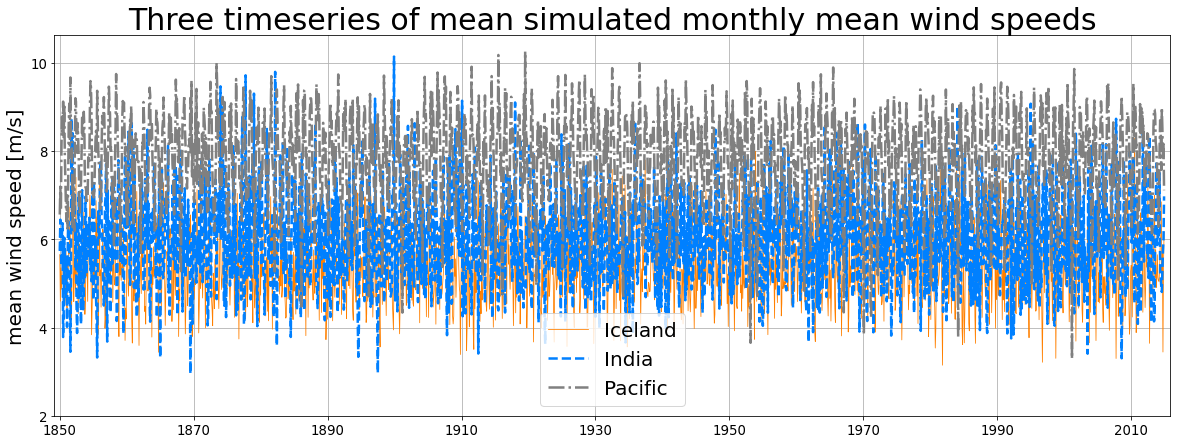

In [25]:
# timeseries plot 

plt.figure(figsize= (20,7))

# fontsize 
s = 20


# define new colors (for matplotlib this can be done with a tuple of 3 float values)
azure = (0, 0.5, 1)
orange = (1 ,0.5, 0 )
grey = (0.5, 0.5, 0.5)


# actual plot functions with input parameters
plt.plot(wind_Ice.sfcWind.values, color = orange, linestyle = '-', linewidth = 0.8, label = 'Iceland')
plt.plot(wind_Ind.sfcWind.values, color = azure,linestyle =  '--', linewidth= 2.5, label = 'India')
plt.plot(wind_Pac.sfcWind.values, color = grey, linestyle= '-.', linewidth = 2.5, label ='Pacific')

# set xtick labels: show every 20 year (make use of the time format of xarray dataset)
plt.xticks(np.arange(np.size(wind_Ice.sfcWind.values))[::12*20], labels = wind_Ice.time.dt.year.values[::12*20], fontsize= s/1.5)
plt.yticks(np.arange(2,12,2), np.arange(2,12,2), fontsize= s/1.5)

# axis labels 
plt.ylabel('mean wind speed [m/s]', fontsize= s)

# axis limits
plt.xlim(-10, np.size(wind_Ice.sfcWind.values) + 10)


# grid on
plt.grid()

# title and legend 
plt.title('Three timeseries of mean simulated monthly mean wind speeds', fontsize = s*1.5)
plt.legend(fontsize= s)

# save figure 
plt.savefig('timeseries_colorblind.png')

# show plot 
plt.show()

## Maps with cartopy 


In the previous examples, we used the functions *plt.imshow()* or *plt.pcolormesh()* to quickly plot the datasets. However, for a paper or a scientific report you should invest some more time in making such maps not only more beautiful, but also more readable. You should always make sure to add all necessary features that facilitate to understand the main scientific message. To display coordinates is, for example, essential and you may even want to show maps in different projections, something that is not possible with the above named functions.

If you have not done so, you need to install the python package **cartopy**. This python package is the most common that one that is used to create maps. Note that you can still find examples of **Basemap** in the internet. However, Basemap is deprecated and not used any longer due to the Cartopy project. 


If you are using anaconda: *conda install -c conda-forge cartopy*


In [ ]:
# command to install cartopy via pip from notebook 
!pip install cartopy

You may check out the examples here as well:

https://scitools.org.uk/cartopy/docs/latest/

https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html

In [1]:
#import cartopy and matplotlib.colors which is useful to customize your colorbars 
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors

In [62]:
# import surface air and ocean temperatures which have been saved as numpy arrays (from exercise 3)

# why different now? > this is just to show you that you can save data arrays either as netCDF files or as numpy arrays
# the advantage of netCDF files is that you can directly import the data as xarray and have all attributes and coordinates for the datapoints 
airJan = np.load('airJan.npy')
thetaJan = np.load('thetaJan.npy')    

# get the interpolated data as well 
airJan_int = np.load('airJan_int.npy')
thetaJan_int = np.load('thetaJan_int.npy')  

# load corresponding coordinates 
lon = np.load('lon.npy')
lat = np.load('lat.npy')    
lonO = np.load('lonO.npy')
latO = np.load('latO.npy')   
lon_int = np.load('lon_int.npy')
lat_int = np.load('lat_int.npy')    

**Robinson projection**

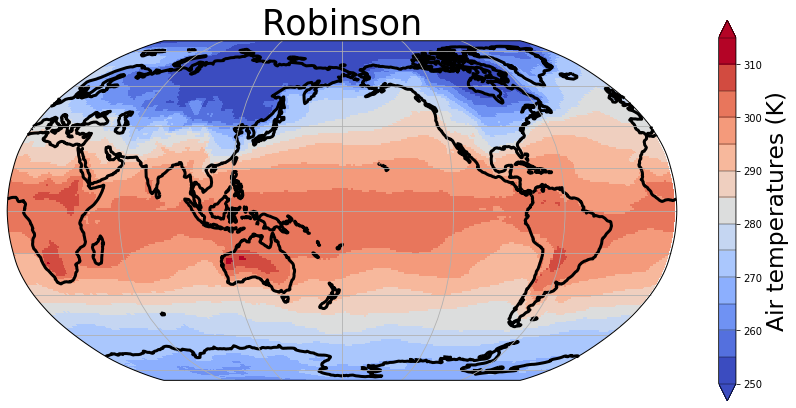

In [32]:
fig =plt.figure(figsize=(15,7))

# coordinates 
lons = lon[0] 
lats = lat[:,0]
# set projection and extent 
ax = plt.axes(projection=ccrs.Robinson(central_longitude= 180))


# customizing of colorbar 
cmap=plt.cm.coolwarm
r = np.arange(250,320,5)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

# plot (plotting function can be any, instead you could for example also use plt.contourf() )
m =plt.pcolormesh(lons, lats, airJan, cmap = cmap, norm = norm, transform= ccrs.PlateCarree())

# add extra features 
s= 35
plt.title('Robinson', fontsize= s)
ax.coastlines(color = 'black', linewidth = 3.0)
ax.gridlines(draw_labels=False)

# colorbar formatting
cbar= plt.colorbar(m, drawedges=True, orientation='vertical', extend = 'both')
cbar.set_label('Air temperatures (K)', fontsize = s/1.5)
cbar.outline.set_edgecolor('black')


#save figure as png 
plt.savefig('airJan_robinson.png')

plt.show()

**Stereographic projection**

This one, I have to admit, is a bit tricky with cartopy. Check out the following example: 

https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html


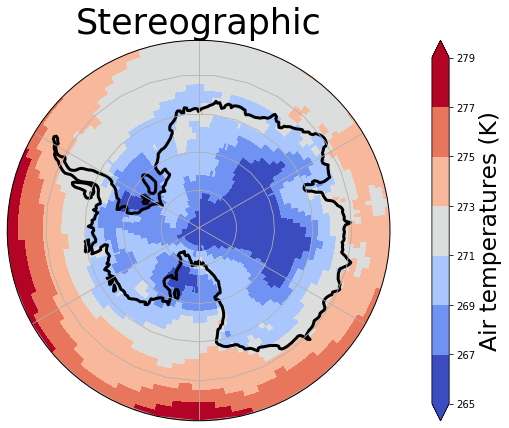

In [79]:
fig =plt.figure(figsize=(15,7))

# get 1D coordinates 
lons = lon[0] 
lats = lat[:,0]
# set projection and extent 
ax = plt.axes(projection=ccrs.Stereographic(central_latitude=-90))


# stereographic projection needs cyclic input coordinates,
# for this two specific packages are needed:
from cartopy.util import add_cyclic_point as cycpt 
import matplotlib.path as mpath

# zoom in to Antarctica 
ax.set_extent([-180,180,-60,-90], crs = ccrs.PlateCarree())
# define circle 
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# get cyclic coordinates for projection
data_cyclic, lon_cyclic = cycpt(airJan, lons)
lon_cyclic= np.ma.getdata(lon_cyclic)
data_cyclic = np.ma.getdata(data_cyclic) 
lons2d, lats2d = np.meshgrid(lon_cyclic, lats)

# since Antarctica is colder you want to change the displayed range of colors 
r = np.arange(265,281,2)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)


# plot (plotting function can be any, instead you could for example also use plt.pcolormesh() )
m =plt.pcolormesh(lons2d, lats2d, data_cyclic, transform= ccrs.PlateCarree(), cmap = cmap, norm = norm)

# add extra features 
s= 35
plt.title('Stereographic', fontsize= s)
ax.coastlines(color = 'black', linewidth = 3.0)
ax.gridlines(draw_labels=False)

# colorbar 
cbar= plt.colorbar(m, extend = 'both', orientation='vertical')
cbar.set_label('Air temperatures (K)', fontsize = s/1.5)


#save figure as png 
plt.savefig('antartica_stereogr.png')

plt.show()

**Overlay with ocean temperature contour** 

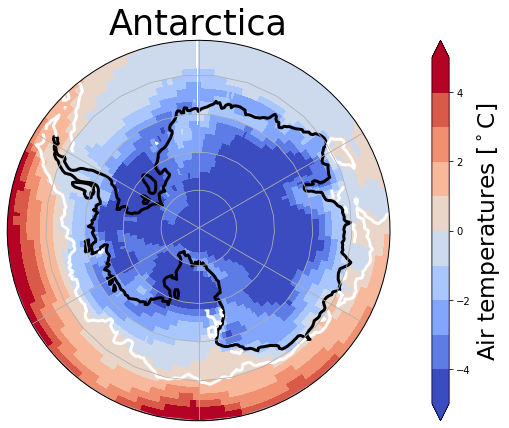

In [80]:
fig =plt.figure(figsize=(15,7))

# get 1D coordinates 
lons = lon_int[0] 
lats = lat_int[:,0]
# set projection and extent 
ax = plt.axes(projection=ccrs.Stereographic(central_latitude=-90))


# this time we use the interpolated data for ocean and air 
ax.set_extent([-180,180,-60,-90], crs = ccrs.PlateCarree())
# set boundary 
ax.set_boundary(circle, transform=ax.transAxes)
# get cyclic coordinates for projection
data_cyclic, lon_cyclic = cycpt(airJan_int, lons)
lon_cyclic= np.ma.getdata(lon_cyclic)
data_cyclic = np.ma.getdata(data_cyclic) 
lons2d, lats2d = np.meshgrid(lon_cyclic, lats)
# ocean data 
oceandata_cyclic, olon_cyclic = cycpt(thetaJan_int, lons)
olon_cyclic= np.ma.getdata(olon_cyclic)
oceandata_cyclic = np.ma.getdata(oceandata_cyclic) 
olons2d, olats2d = np.meshgrid(olon_cyclic, lats)

# since Antarctica is colder you want to change the displayed range of colors 
r = np.arange(-5,6,1)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)


# plot (plotting function can be any, instead you could for example also use plt.pcolormesh() )
# this time, display temperature in degC! 
m =plt.pcolormesh(lons2d, lats2d, data_cyclic- 273.15, transform= ccrs.PlateCarree(), cmap = cmap, norm = norm)
# add contour for ocean temperature O degree contour
plt.contour(olons2d, olats2d, oceandata_cyclic, levels = [0], linewidths = 3.0, transform= ccrs.PlateCarree(), cmap = 'Greys')

# add same extra features again
plt.title('Antarctica', fontsize= s)
ax.coastlines(color = 'black', linewidth = 3.0)
ax.gridlines(draw_labels=False)

# colorbar 
cbar= plt.colorbar(m, extend = 'both', orientation='vertical')
cbar.set_label('Air temperatures [$^\circ$C]', fontsize = s/1.5)


#save figure as png 
plt.savefig('antartica_stereogr_with_ocean_contour.png')

plt.show()

**Map of ocean temperatures** 

Whereas in Matlab, you can use a scatter function to display irregularly spaced data, the most common way to deal with such data is to interpolate the data first. Since you have already done this, you can simply make a plot of the global interpolated ocean temperatures here to verify your contour line (e.g. using the PlateCarree projection). 

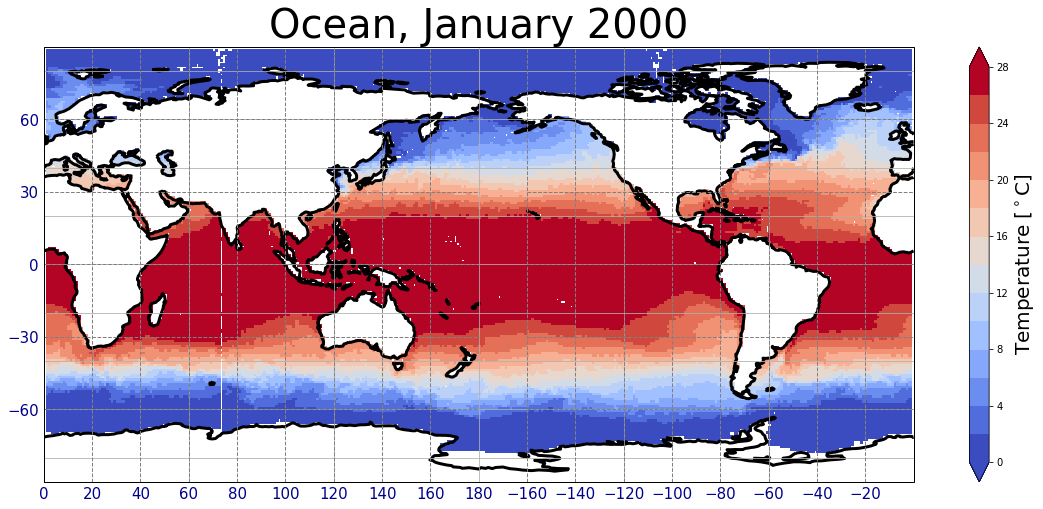

In [139]:
fig =plt.figure(figsize=(20,8))

# customizing of colorbar 
cmap=plt.cm.viridis
r = np.arange(0, 30, 2)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

# set projection and extent 
cmap = plt.cm.coolwarm
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# plot (plotting function can be any, instead you could for example also use plt.contourf() )
m =plt.pcolormesh(lon_int, lat_int, thetaJan_int, transform= ccrs.PlateCarree(), cmap = cmap, norm = norm)

# add extra features 
ax.coastlines(color = 'black', linewidth = 3.0)
ax.gridlines(draw_labels=False)
s = 20 # fontsize 
plt.title('Ocean, January 2000', fontsize= s*2)


# labels for coordinates
# you can use the usual plt.xticks() or the coordinate formatter from cartopy:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# note that grid labels are not supported for all projections
gl = ax.gridlines(crs = ccrs.PlateCarree(), linewidth=1, color='gray', linestyle='--', draw_labels=True, xlocs=np.arange(-160, 181, 20), ylocs=np.arange(-90, 91, 30))
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'darkblue'}
gl.ylabel_style = {'size': 15, 'color': 'darkblue'}

# colorbar 
cbar= plt.colorbar(m, extend = 'both')
cbar.set_label('Temperature [$^\circ$C]', fontsize = s)

#save figure as png 
plt.savefig('oceantemps.png')

plt.show()

**Difference map Ocean - Air**

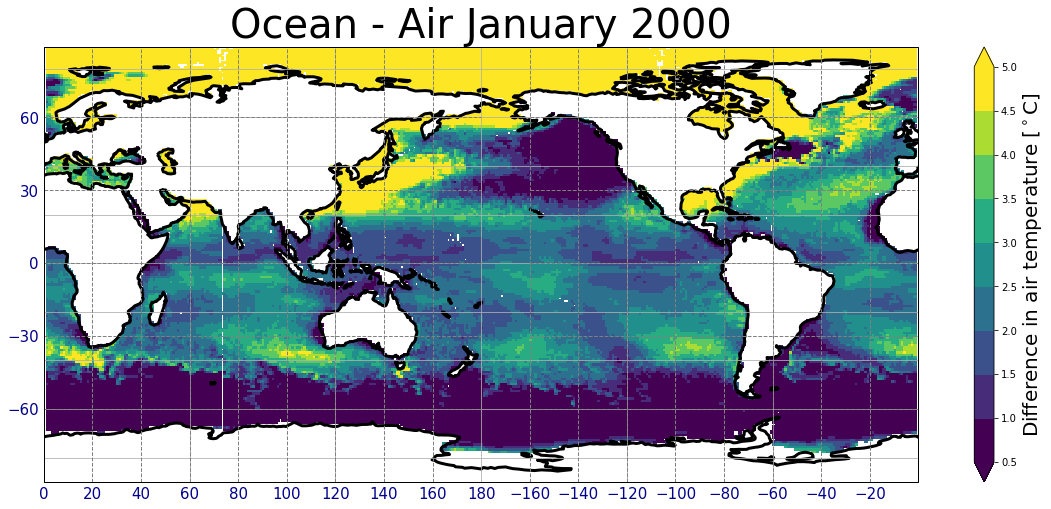

In [120]:
fig =plt.figure(figsize=(20,8))

# calculate difference 
diff = thetaJan_int - (airJan_int - 273.15)

# customizing of colorbar 
cmap=plt.cm.viridis
r = np.arange(0.5, 5.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

# coordinates 
lons = lon_int[0] 
lats = lat_int[:,0]
# set projection and extent 
cmap = plt.cm.viridis
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = 180))
ax.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),np.max(lats)])

# plot (plotting function can be any, instead you could for example also use plt.contourf() )
m =plt.pcolormesh(lons, lats, diff, transform= ccrs.PlateCarree(), cmap = cmap, norm = norm)

# add extra features 
ax.coastlines(color = 'black', linewidth = 3.0)
ax.gridlines(draw_labels=False)
s = 20 # fontsize 
plt.title('Ocean - Air January 2000', fontsize= s*2)


# labels for coordinates
# you can use the usual plt.xticks() or the coordinate formatter from cartopy:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

gl = ax.gridlines(crs = ccrs.PlateCarree(), linewidth=1, color='gray', linestyle='--', draw_labels=True, xlocs=np.arange(-160, 181, 20), ylocs=np.arange(-90, 91, 30))
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'darkblue'}
gl.ylabel_style = {'size': 15, 'color': 'darkblue'}

# colorbar 
cbar= plt.colorbar(m, extend = 'both')
cbar.set_label('Difference in air temperature [$^\circ$C]', fontsize = s)

#save figure as png 
plt.savefig('difference_map.png')

plt.show()